In [166]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False)   

In [167]:
X, y = mnist.data, mnist.target

In [168]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [169]:
X.shape

(70000, 784)

In [170]:
y.shape

(70000,)

Each image has some type of feature or something 


In [171]:
import matplotlib.pyplot as plt

def plot_img(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

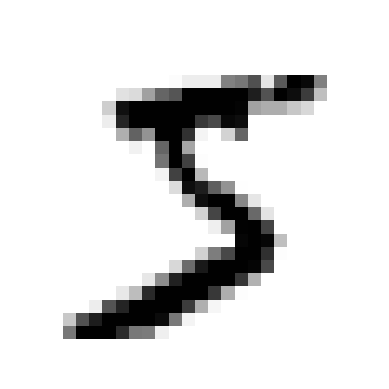

In [172]:
some_digit = X[0]
plot_img(some_digit)
plt.show()

In [173]:
y[0]

'5'

## Split into training set and test set

Why did we use this 10% for testing is there a particular reason

In [174]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Training a Binary Classifier

Let's first deal with a simpler problem 5 and non 5, that's what binary mean

In [175]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')

Let's pick a classifier and train it stochastic gradient descent, this is something called a binary classifier that check whether something is the thing we're looking for and something is not the thing we're looking for


In [176]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [177]:
sgd_clf.predict([some_digit])

array([ True])

## Performances Measures

Measuring Accuracy using cross-validaton

In [178]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [179]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)
print(any(dummy_clf.predict(X_train )))

False


### Confusion Matrices

To compute confusion matrix needed a set of predictions so they can be compared to the actual targets

In [180]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [181]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)

In [182]:
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

#### Precision and Recall


In [183]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [184]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

As you can see the model doesn't look as good as it used to be, among all the correct guess it only guess the 83% of the 5, and it only collect 65% of the 5 among all 5

In [185]:
from sklearn.metrics import f1_score 

f1_score(y_train_5, y_train_pred)

0.7325171197343847

Precision/Recall Trade off

In [186]:
y_scores = sgd_clf.decision_function([some_digit])

In [187]:
y_scores

array([2164.22030239])

In [188]:
threshold = 0

In [189]:
y_some_digit_pred = (y_scores > threshold)

In [190]:
threshold = 3000
y_scores > threshold

array([False])

In [191]:
# this is result for further analysis

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [192]:
# what the fuck is it types then?
y_scores.shape

(60000,)

In [197]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [217]:
precisions.shape

(60001,)

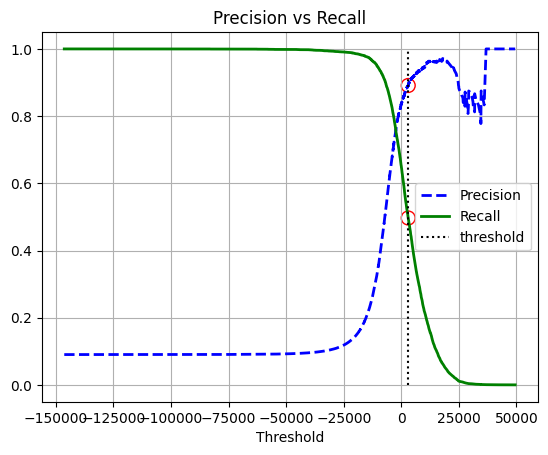

In [199]:
# ! This is just for data analysis
import numpy as np

plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
# plt.vlines(thresholds, 0, 1.0, "k", "dotted", label="threshold")
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# Calculate the y-values where the threshold line intersects the precision and recall lines
# This is a placeholder; you will need to calculate this based on your data
precision_at_threshold = np.interp(threshold, thresholds, precisions[:-1])
recall_at_threshold = np.interp(threshold, thresholds, recalls[:-1])

# Add circles at the intersection points
plt.scatter([threshold, threshold], [precision_at_threshold, recall_at_threshold], s=100, facecolors='none', edgecolors='r')


plt.title("Precision vs Recall")
plt.xlabel("Threshold")
plt.legend()

plt.grid()
plt.show()

Text(0.9, 0.19035000000000002, 'Higher threshold')

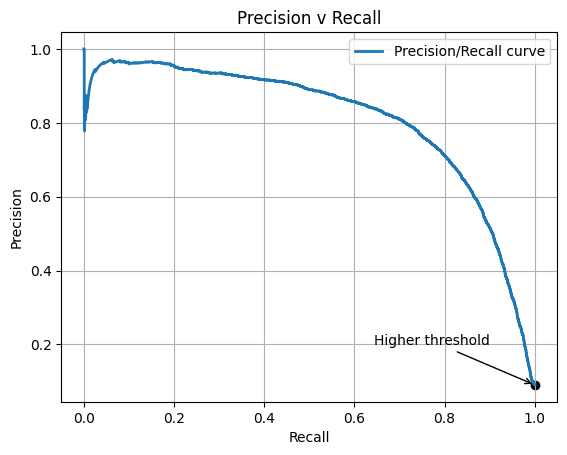

In [233]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

plt.grid()
plt.legend()
plt.title("Precision v Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")

threshold_index = np.argmax(np.abs(thresholds - threshold))

plt.scatter([recalls[threshold_index]], [precisions[threshold_index]], color='black')

# Annotate the point with text and an arrow
plt.annotate('Higher threshold', 
             xy=(recalls[threshold_index], precisions[threshold_index]), 
             xytext=(recalls[threshold_index]-0.1, precisions[threshold_index]+0.1), 
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             horizontalalignment='right', verticalalignment='bottom')



You can find the lowest threshold that gives you 90% precision, for this you can use the NumPy array's argmax(), this return the first index of the maximum value, which is in this case means the first `True` value


In [201]:
idx_for_90_precision = (precisions >= 0.90).argmax()


In [202]:
threshold_for_90_precision = thresholds[idx_for_90_precision]

In [203]:
precisions.shape

(60001,)

In [204]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [205]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

#### ROC Curve

Also known as the receiver operating characteristic is another common toll used with binary classifier 

In [206]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [207]:
fpr.shape

(3908,)

Text(0, 0.5, 'True Positive Rate (Recall)')

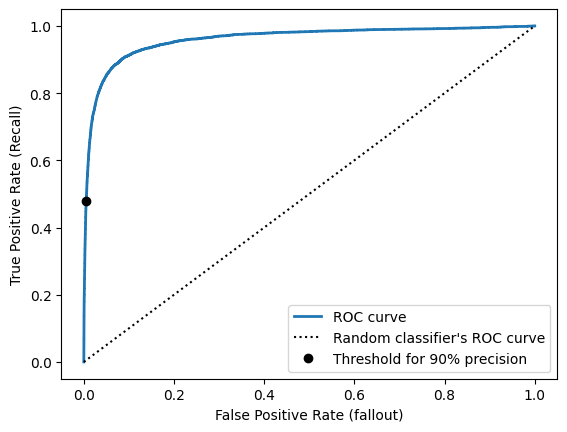

In [208]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

plt.legend()
plt.xlabel("False Positive Rate (fallout)")
plt.ylabel("True Positive Rate (Recall)")

To reach 90% precision. Find the first true value

In [209]:
from sklearn.metrics import roc_auc_score 

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [210]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

đ

In [211]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, method="predict_proba")